# Feature Engineering (Missing Data, Outliers Handling, Cardinality, Hyperparameter Turning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Regression Metrics
from sklearn.metrics import mean_squared_error

# Classification Metrics
from sklearn.metrics import roc_auc_score

## Missing Data Imputation

### Missing Value Category

#### Missing Completely at Random (MCAR)

Characteristics of Missing Completely At Random (MCAR) :

- The probability of being missing is the same for all the observations (row).
- There is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those mising data points are a random subset of the data. - There is nothing systematic going on that makes some data more likely to be missing than other.
- Disregarding those cases would not bias the inferences made (only if total number of missing values is small).

In [2]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_titanic[df_titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As you can see above, Miss Icard and Mrs Stones traveled together. This can be seen from the same type of Ticket. After searching the internet, it was found that Miss Icard was a maid of Mrs. Stone.

Conclusions of missing values for Embarked (based on personal assumptions):

- There does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable.
- The fact that these women survived, means that they could have been asked for this information.
- Very likely this missingness was generated at the time of building the dataset and therefore we could assume that it is completely random.
- We can assume that the probability of data being missing for these 2 women is the same as the probability for this variable to be missing for any other person. Of course this will be hard, if possible at all, to prove.

#### Missing Not at Random (MNAR)

Characteristics of Missing Not At Random (MNAR) :

- There is a mechanism or a reason why missing values are introduced in the dataset.
- Their being missing depends on information not recorded in the dataset.
- In this situation, we would be better off flagging those missing values in order to predict our target.

In [5]:
df_titanic[df_titanic.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df_titanic[df_titanic.Cabin.isna()].Survived.value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [7]:
df_titanic[df_titanic.Age.isna()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

### Flagging

In [8]:
df_titanic_2 = df_titanic.copy()
df_titanic_2['cabin_null'] = np.where(df_titanic_2.Cabin.isna(),1,0)
df_titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
# Data Grouping Survived vs Not Survived

print('Value Counts')
print(df_titanic_2.groupby('Survived')['cabin_null'].value_counts())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64


In [10]:
print('Mean')
print(df_titanic_2.groupby('Survived')['cabin_null'].mean())

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


In [11]:
df_titanic_2['age_null'] = np.where(df_titanic_2.Age.isna(),1,0)
df_titanic_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [12]:
print('Value Counts')
print(df_titanic_2.groupby('Survived')['age_null'].value_counts())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64


In [13]:
print('Mean')
print(df_titanic_2.groupby('Survived')['age_null'].mean())

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


## Missing Value Handling Method

## Complete Case Analysis
Complete-case analysis (CCA), also called list-wise deletion of cases, consists in simply discarding observations where values in any of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in all of the variables (Xs).

CCA can be applied to both categorical and numerical variables.

**Assumptions :**

* CCA works well when the data are missing completely at random (MCAR).
* In this case, excluding observations with missing data would be the same as randomly excluding some observations from the dataset, given that the missing data are totally at random.
* Works well if total number of missing values is small.

**Advantages :**

* Easy to implement
* The same set of data (albeit a reduced set) is used for all analyses (no data manipulation)
* Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

**Disadvantages :**

* It can exclude a large fraction of the original sample, which are potentially informative for the analysis
* CCA will be biased if the complete cases systematically differ from the original sample (e.g. when the missing information is in fact MAR (Missing At Random) or MNAR (Missing Not At Random).

In [14]:
df_titanic_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_null       0
age_null         0
dtype: int64

In [15]:
print('Total Passengers in Titanic = ', len(df_titanic))
print('Total Passengers in Titanic After Drop = ', len(df_titanic.dropna()))
print('Percentage of Missing Data = ', (len(df_titanic)-len(df_titanic.dropna()))/len(df_titanic)*100,'%')

Total Passengers in Titanic =  891
Total Passengers in Titanic After Drop =  183
Percentage of Missing Data =  79.46127946127946 %


In [16]:
df_titanic_2[(df_titanic_2.Embarked.isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0,0


Metode CCA (drop baris yang mengandung null) tidak cocok untuk data null yang berlebih dan missing values non random.

### Mean, Median, Imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used for machine learning or deep learning.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable with :

* Mean : if the variable has a Normal/Gaussian distribution.
* Median : if the variable has a skewed distribution.

**Assumptions** : The data are missing completely at random (MCAR).

If this is the case, we can think of replacing the NA with the most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

**Advantages** :

* Easy to implement
* Fast way of obtaining complete datasets

**Limitations** :

* Distortion of original variance
  When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations (since the imputed values do not differ from the mean or from each other). Therefore leading to underestimation of the variance.

* Distortion of covariance/correlation with remaining variables within the dataset

    In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. This is because we may be destroying intrinsic correlations since the mean/median that now replace NA will not preserve the relation with the remaining variables.

Imputation should be done over the training set, and then propagated to the test set. This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only.

In [17]:
df_titanic_3 = df_titanic.copy()
X = df_titanic_3.drop('Survived',1)
y = df_titanic_3['Survived']
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split (X,y,test_size=0.3,random_state=0)

In [18]:
X_train_titanic.shape, X_test_titanic.shape

((623, 11), (268, 11))

<AxesSubplot:>

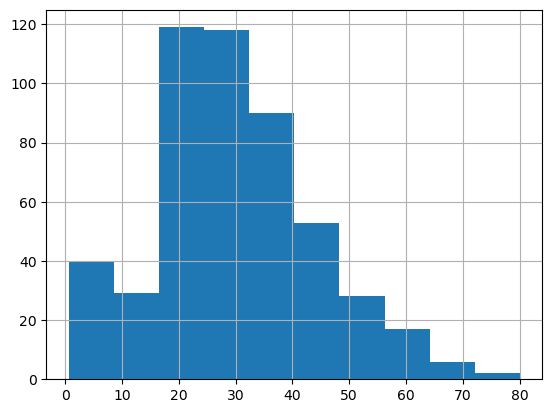

In [19]:
X_train_titanic.Age.hist()

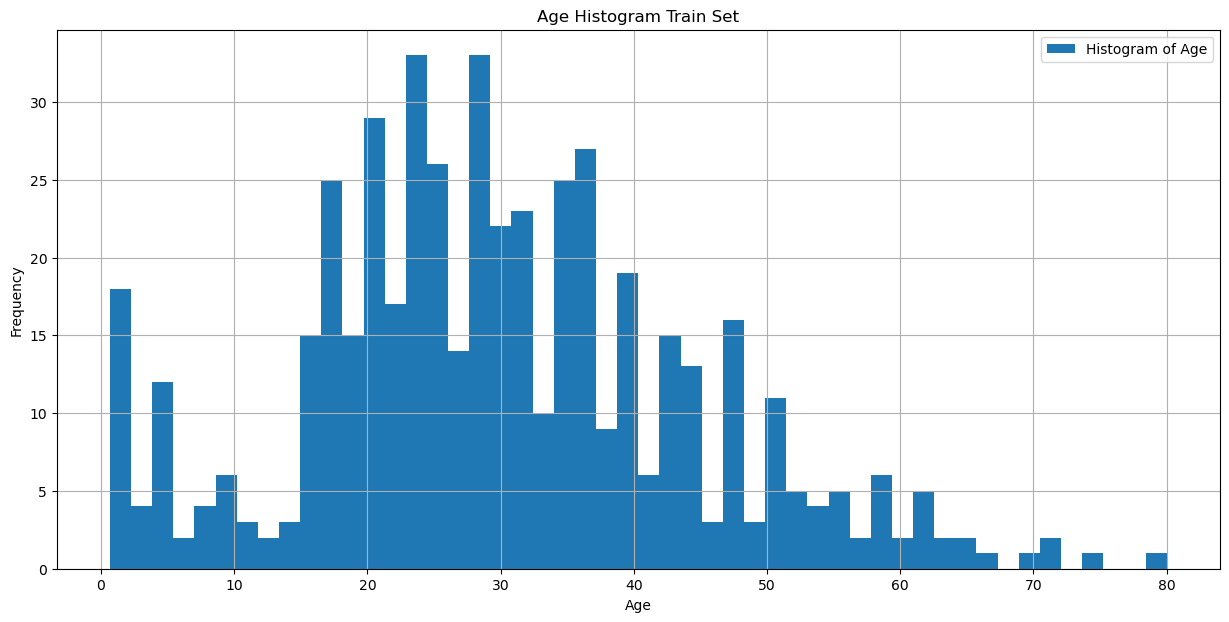

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

X_train_titanic.Age.hist(bins=50, ax=ax,label='Histogram of Age')
ax.set_title('Age Histogram Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

In [21]:
print('Skewness:', X_train_titanic.Age.skew())

Skewness: 0.3361317253050765


In [22]:
print('Mean Age',X_train_titanic.Age.mean())
print('Median Age',X_train_titanic.Age.median())

Mean Age 29.915338645418327
Median Age 29.0


In [23]:
def impute_na(df,variable,mean_value,median_value):
    df[variable+'_mean'] = df[variable].fillna(mean_value)
    df[variable+'_median'] = df[variable].fillna(median_value)
    df[variable+'_zero'] = df[variable].fillna(0)
    
    return df

In [24]:
age_mean = X_train_titanic.Age.mean()
age_median = X_train_titanic.Age.median()

In [25]:
X_train_titanic = impute_na(X_train_titanic, 'Age', age_mean, age_median)
X_test_titanic = impute_na(X_test_titanic, 'Age', age_mean, age_median)
X_train_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0


In [26]:
# Standard Deviasi

print('STD - Original',X_train_titanic['Age'].std())
print('STD - After Median Imputation',X_train_titanic['Age_median'].std())
print('STD - After Mean Imputation',X_train_titanic['Age_mean'].std())
print('STD - After Zero Imputation',X_train_titanic['Age_zero'].std())

STD - Original 14.506993804588443
STD - After Median Imputation 13.024746215318798
STD - After Mean Imputation 13.019703562523883
STD - After Zero Imputation 17.60095360447329


In [27]:
X_train_titanic['Age_zero']

857    51.0
52     49.0
386     1.0
124    54.0
578     0.0
       ... 
835    39.0
192    19.0
629     0.0
559    36.0
684    60.0
Name: Age_zero, Length: 623, dtype: float64

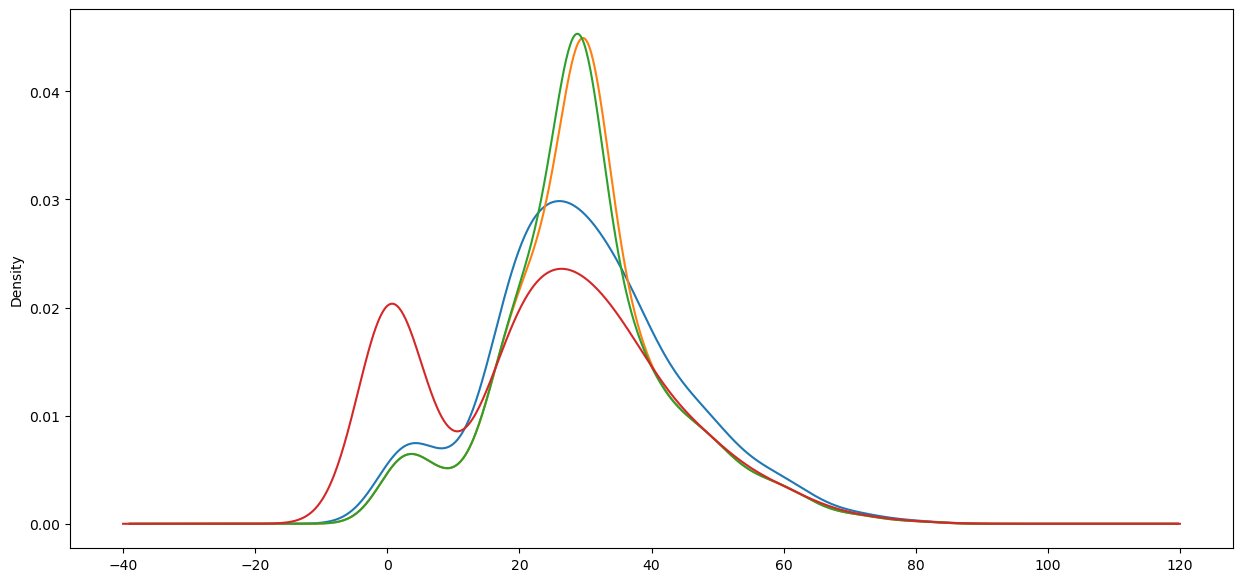

In [28]:
# Visualisasi

fig,ax = plt.subplots(1,1,figsize=(15,7))
X_train_titanic.Age.plot(kind='kde',ax=ax)
X_train_titanic.Age_mean.plot(kind='kde',ax=ax)
X_train_titanic.Age_median.plot(kind='kde',ax=ax)
X_train_titanic.Age_zero.plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()

In [29]:
print('Kurtosis Original',X_train_titanic.Age.kurtosis())
print('Kurtosis Mean Imputed',X_train_titanic.Age_mean.kurtosis())
print('Kurtosis Median Imputed',X_train_titanic.Age_median.kurtosis())

Kurtosis Original 0.24738182377613738
Kurtosis Mean Imputed 1.030128637102929
Kurtosis Median Imputed 1.045538700158997


### Komparasi Metrics Antar Imputing Method

In [30]:
# Model Impute Zero

rf_zero = RandomForestClassifier(n_estimators=100,random_state=20,max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero','Fare']],y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero',"Fare"]])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero','Fare']])

print('Train Zero')
print('RF roc-auc',roc_auc_score(y_train_titanic,pred_zero_train[:,1]))
print('Test Zero')
print('RF roc-auc',roc_auc_score(y_test_titanic,pred_zero_test[:,1]))

#Model Impute Mean

rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))

Train Zero
RF roc-auc 0.7623804255872975
Test Zero
RF roc-auc 0.7513988095238096
Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523
Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049


Evaluation notes :

* Children were more likely to survive the catastrophe (0.57 for children vs 0.38 for the entire Titanic). Thus, smaller values of Age are a good indicator of survival.

* When we replace NA with zeroes, we are masking the predictive power of Age. After zero imputation, it looks like children did not have a greater chance of survival, and therefore the model loses predictive power.

* On the other hand, replacing NA with the mean/median, preserves the predictive power of the variable Age, as smaller Age values will favour survival.

### Random Sample Imputation

Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA.

Random Sample Imputation is in principle similar to mean/median imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

**Assumptions :**

* The data are Missing Completely At Random (MCAR).
    
    If this is the case, it makes sense to substitute the missing values, by values extracted from the original variable distribution.
* From a probabilistic point of view, values that are more frequent (like the mean or the median) will be selected more often (because there are more of them to select from), but other less frequent values will be selected as well. Thus, the variance of the variable is preserved.

    The rationale is to replace the population of missing values with a population of values with the same distribution of the variable.

**Advantages :**

* Easy to implement
* Fast way of obtaining complete datasets
* Preserves the variance of the variable

**Limitations :** Randomness

Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once and then the dataset is scored and that is the end of the problem. However, in business scenarios the situation is very different.

In [31]:
df_titanic_4 = df_titanic.copy()
X = df_titanic_4
y = df_titanic_4.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
def impute_na_rand(df,variable,mean_value,median_value):
    df[variable+'_mean'] = df[variable].fillna(mean_value)
    df[variable+'_median'] = df[variable].fillna(median_value)
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_random'] = df[variable]
    
    # extract random sample to impute NA
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    return df

In [33]:
age_median = X_train.Age.median()
age_mean = X_train.Age.mean()

In [34]:
X_train = impute_na_rand(X_train,'Age',age_mean,age_median)
X_test = impute_na_rand(X_test,'Age',age_mean,age_median)
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


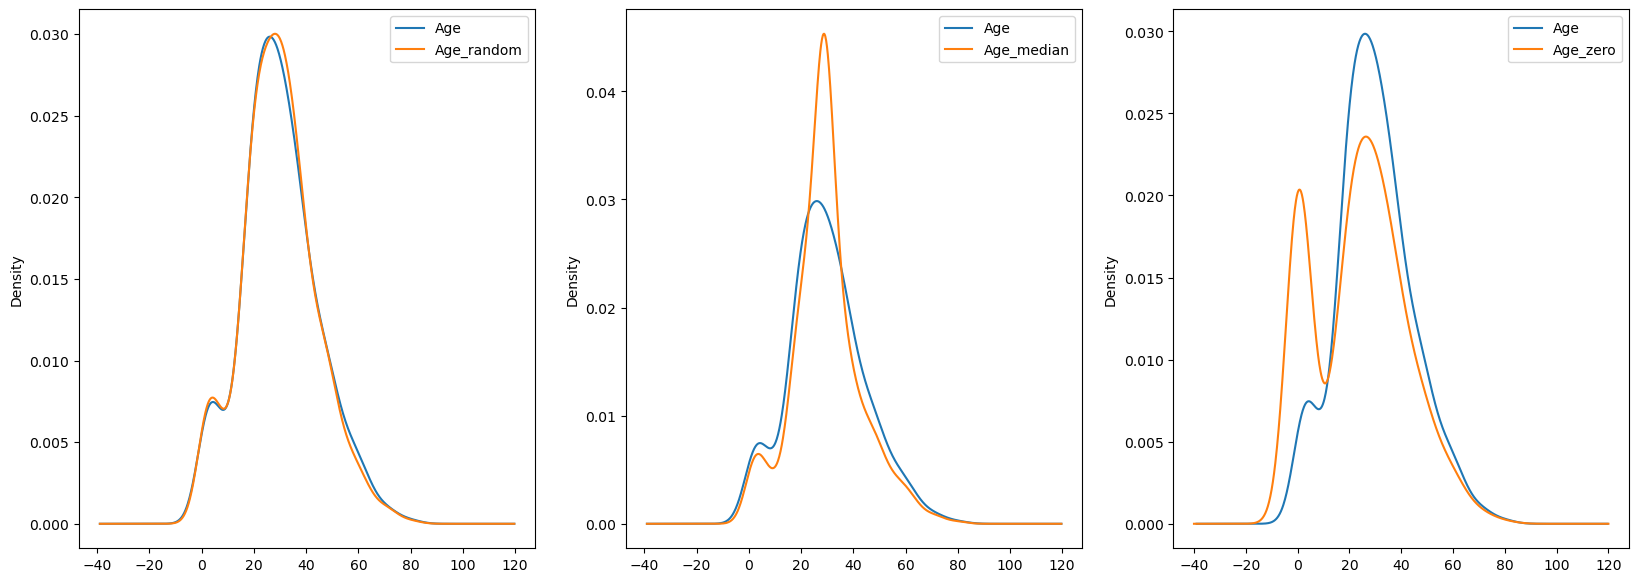

In [35]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

X_train.Age.plot(kind='kde',ax=ax[0])
X_train.Age_random.plot(kind='kde',ax=ax[0])
lines,labels = ax[0].get_legend_handles_labels()
ax[0].legend()

X_train.Age.plot(kind='kde',ax=ax[1])
X_train.Age_median.plot(kind='kde',ax=ax[1])
lines,labels = ax[1].get_legend_handles_labels()
ax[1].legend()

X_train.Age.plot(kind='kde',ax=ax[2])
X_train.Age_zero.plot(kind='kde',ax=ax[2])
lines,labels = ax[2].get_legend_handles_labels()
ax[2].legend()

plt.show()

In [36]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858




So if the performance of median imputation vs random sample imputation are similar, which method should I use?

Choosing which imputation method to use, will depend on various things:

* Do you want to preserve the distribution of the variable?
* Are you willing to accept an element of randomness in your imputation method?
* What is your aims? Are you aiming to win a data competition? or to make business driven decisions?
* You must remeber that randomness can lead to different scores being assigned to the same observation.

There is no 'correct' answer to which imputation method you can use, it rather depends on what you are trying to achieve.

### Adding Variable to Capture Missing Values

In previous lectures we studied how to replace missing values by mean/median imputation or by extracting a random sample of the variable for those instances where data is available, and using those values to replace the missing values. We also discussed that these 2 methods assume that the missing data are missing completely at random (MCAR).

So what if the data are not missing completely at random? By using this procedure, we would be missing important, predictive information.

How can we prevent that?

We can capture the importance of missingness by creating an additional variable indicating whether the data was missing for that observation (1) or not (0). The additional variable is a binary variable :

* 0 indicating that a value was present for that observation, and
* 1 indicating that the value was missing for that observation.

**Advantages :**

* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages :** Expands the feature space

* This method of imputation will add 1 variable per variable in the dataset with missing values.

* So if a dataset contains 10 features, and all of them have missing values, we will end up with a dataset with 20 features.

    The original features where we replaced the missing values by the mean/median (or random sampling), and additional 10 features, indicating for each of the variables, whether the value was missing or not.

This may not be a problem in datasets with tens to a few hundreds of variables, but if your original dataset contains thousands of variables, by creating an additional variable to indicate NA, you will end up with very big datasets.

In addition, data tends to be missing for the same observation on multiple variables, so it may also be the case, that many of your added variables will be actually similar to each other.

In [37]:
df_titanic_5 = df_titanic.copy()
X_5 = df_titanic_5
y_5 = df_titanic_5.Survived

X_train_5,X_test_5,y_train_5,y_test_5 =  train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
def impute_na_flag(df,variable,mean_value,median_value):
    df[variable+'_mean'] = df[variable].fillna(mean_value)
    df[variable+'_median'] = df[variable].fillna(median_value)
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_random'] = df[variable]
    
    ## Extract Random Sample to Impute NA
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    df[variable+'_NA'] = np.where(df[variable].isna(),1,0)
    
    return df

In [39]:
age_mean = X_train_5.Age.mean()
age_median = X_train_5.Age.median()

In [40]:
X_train_5 = impute_na_flag(X_train,'Age',age_mean,age_median)
X_test_5 = impute_na_flag(X_test,'Age',age_mean,age_median)
X_train_5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0,0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0,0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5,1
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0,0


In [41]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_5[['Age_zero', 'Fare']], y_train_5)

pred_zero_train = rf_zero.predict_proba(X_train_5[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_5[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_5[['Age_mean', 'Fare']], y_train_5)

pred_mean_train = rf_mean.predict_proba(X_train_5[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_5[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_5, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_5[['Age_median', 'Fare']], y_train_5)

pred_median_train = rf_median.predict_proba(X_train_5[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_5[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_5[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train_5[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_5[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_5, pred_random_test[:,1])))
print()

## Model with `Age_mean` and 'Age_NA'
rf_na = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_na.fit(X_train_5[['Age_mean', 'Age_NA', 'Fare']], y_train_5)

pred_na_train = rf_na.predict_proba(X_train_5[['Age_mean', 'Age_NA', 'Fare']])
pred_na_test = rf_na.predict_proba(X_test_5[['Age_mean', 'Age_NA', 'Fare']])

print('Using mean and NA imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_5, pred_na_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_5, pred_na_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858

Using mean and NA imputation
Train - Random Forests roc-auc : 0.7629281360491095
Test - Random Forests roc-auc  : 0.7517559523809524



### Other Data

In [42]:
df_housing = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20House-Prices.csv')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df_housing_2 = df_housing.copy()
df_housing_2 = df_housing_2[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF','BsmtUnfSF', 'LotFrontage','MasVnrArea','GarageYrBlt',
             'SalePrice']]

In [44]:
df_housing_2.isna().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice        0
dtype: int64

In [45]:
df_housing_2.isna().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [46]:
df_housing_2[df_housing_2.LotFrontage.isna()]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
12,5,912,912,912,140,175,NaN,0.0,1962.0,144000
14,6,1253,1253,1253,0,520,NaN,212.0,1960.0,157000
16,6,1004,1004,1004,0,426,NaN,180.0,1970.0,149000
24,5,1060,1060,1060,406,204,NaN,0.0,1968.0,154000
...,...,...,...,...,...,...,...,...,...,...
1429,6,1440,1440,1440,0,762,NaN,310.0,1981.0,182900
1431,6,958,958,958,0,0,NaN,0.0,1976.0,143750
1441,6,848,848,848,149,151,NaN,147.0,2004.0,149300
1443,6,952,952,952,0,952,NaN,0.0,1916.0,121000


In [47]:
X = df_housing_2
y = df_housing_2.SalePrice

X_train_h,X_test_h,y_train_h,y_test_h=  train_test_split(X,y,test_size=0.3,random_state=0)
X_train_h.shape,X_test_h.shape

((1022, 10), (438, 10))

#### Visualisasi Null Variable

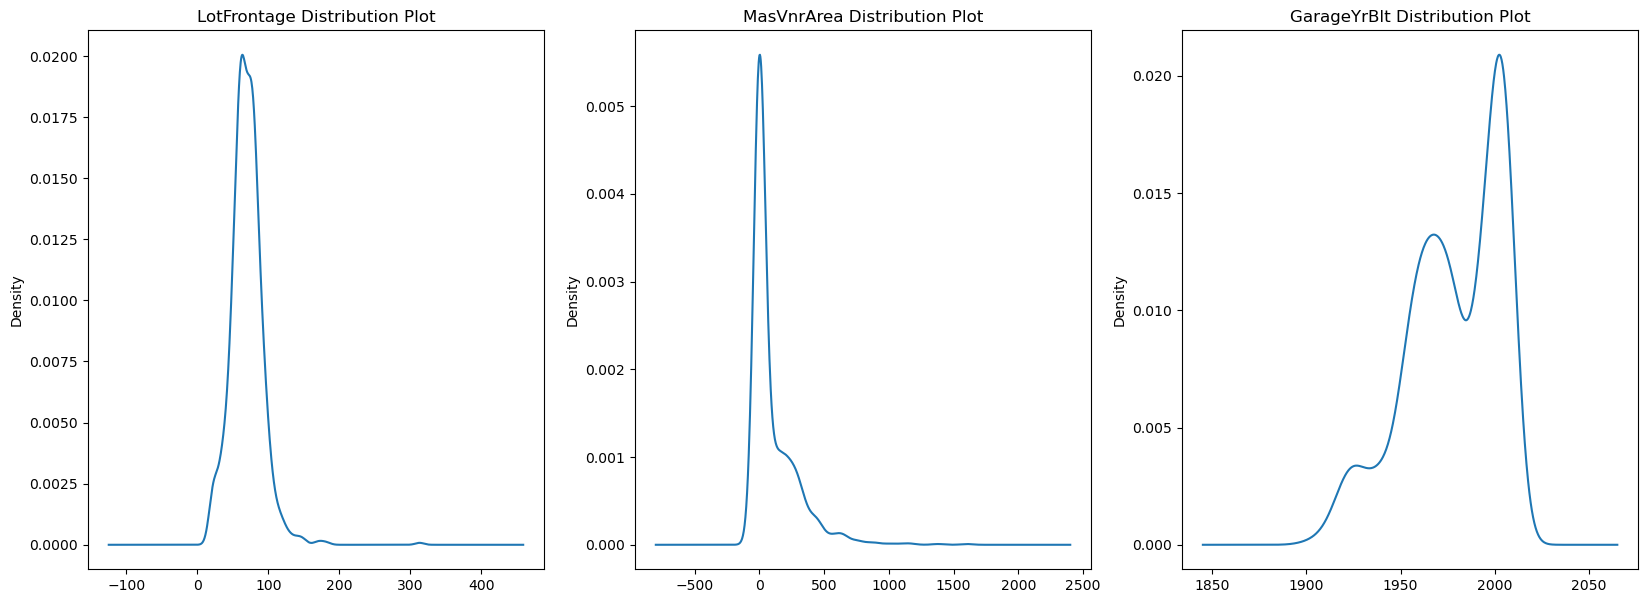

Skewness LotFrontage 1.8847801735623813
Skewness MasVnrArea 2.7582019163711244
Skewness GarageYrBlt -0.6669763943317643


In [48]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

X_train_h.LotFrontage.plot(kind='kde',ax=ax[0])
ax[0].set_title('LotFrontage Distribution Plot')

X_train_h.MasVnrArea.plot(kind='kde',ax=ax[1])
ax[1].set_title('MasVnrArea Distribution Plot')

X_train_h.GarageYrBlt.plot(kind='kde',ax=ax[2])
ax[2].set_title('GarageYrBlt Distribution Plot')

plt.show()

print('Skewness LotFrontage', X_train_h.LotFrontage.skew())
print('Skewness MasVnrArea', X_train_h.MasVnrArea.skew())
print('Skewness GarageYrBlt', X_train_h.GarageYrBlt.skew())

In [49]:
def impute_na_median(df,variable,median):
    df[variable+'_NA'] = np.where(df[variable].isna(),1,0)
    df[variable].fillna(median,inplace=True)
    
    return df

In [50]:
X_train_h[['LotFrontage','MasVnrArea','GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [51]:
X_train_h = impute_na_median(X_train_h,'LotFrontage',X_train_h.LotFrontage.median() )
X_train_h = impute_na_median(X_train_h,'MasVnrArea',X_train_h.MasVnrArea.median())
X_train_h = impute_na_median(X_train_h,'GarageYrBlt',X_train_h.GarageYrBlt.median())

In [52]:
X_test_h = impute_na_median(X_test_h,'LotFrontage',X_test_h.LotFrontage.median() )
X_test_h = impute_na_median(X_test_h,'MasVnrArea',X_test_h.MasVnrArea.median())
X_test_h = impute_na_median(X_test_h,'GarageYrBlt',X_test_h.GarageYrBlt.median())

## Standard Scaler

In [53]:
X_test_h

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
529,6,2035,2515,2515,0,816,70.0,0.0,1975.0,200624,1,1,0
491,6,806,958,1578,0,238,79.0,0.0,1941.0,133000,0,0,0
459,5,709,979,1203,0,524,70.0,161.0,1950.0,110000,1,0,0
279,7,1160,1156,2022,288,768,83.0,299.0,1977.0,192000,0,0,0
655,6,525,525,1092,0,525,21.0,381.0,1971.0,88000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,7,1385,1363,1363,81,96,73.0,0.0,1954.0,241500,0,0,0
445,6,1436,1689,1689,0,1436,73.0,0.0,1956.0,127500,0,0,0
654,8,2109,2113,2113,236,413,91.0,660.0,1995.0,350000,0,0,0
1280,7,1573,1573,1573,0,785,67.0,110.0,2002.0,227000,0,0,0


In [54]:
# With added flag
scaler = StandardScaler()
X_train_h_scaled = scaler.fit_transform(X_train_h.drop('SalePrice',1))
X_test_h_scaled = scaler.transform(X_test_h.drop('SalePrice',1))

# Without added flag
flags = ['LotFrontage_NA','MasVnrArea_NA','GarageYrBlt_NA']
X_train_h_scaled_noflag = scaler.fit_transform(X_train_h.drop(flags+['SalePrice'],1))
X_test_h_scaled_noflag = scaler.transform(X_test_h.drop(flags+['SalePrice'],1))

## Linear Regression

In [55]:
linreg = LinearRegression()

#fit with no flag and imputed median
linreg.fit(X_train_h_scaled_noflag,y_train_h)

pred_train_noflag  = linreg.predict(X_train_h_scaled_noflag)
pred_test_noflag = linreg.predict(X_test_h_scaled_noflag)

print('Median Imputation without flagging')
print('MSE - Train', mean_squared_error(y_train_h,pred_train_noflag))
print('MSE - Test', mean_squared_error(y_test_h,pred_test_noflag))

Median Imputation without flagging
MSE - Train 1161895545.483203
MSE - Test 2213352533.0368657


In [56]:
# With Flag
linreg_2 = LinearRegression()

linreg_2.fit(X_train_h_scaled,y_train_h)

pred_train_flag = linreg_2.predict(X_train_h_scaled)
pred_test_flag = linreg_2.predict(X_test_h_scaled)

print('Median Imputation with flagging')
print('MSE - Train', mean_squared_error(y_train_h,pred_train_flag))
print('MSE - Test', mean_squared_error(y_test_h,pred_test_flag))

Median Imputation with flagging
MSE - Train 1157194541.9444427
MSE - Test 2198183078.1270666


Here, when we build a model using the additional variable to capture missingness of data, we observe :

* In the test set, the MSE is smaller.

    This means that the difference between the real value and the estimated value is smaller, and thus our model performs better.

* There is a difference of ~15 million between the model that replaces with the median and the one that uses median imputation in combination with the additional variables to capture missingness.

    So even when the difference in MSE seems small, when we boil it down to business value, the impact is massive.

## Suggestions
Typically, Mean/Median Imputation is done together with adding a variable to capture those observations where the data was missing, thus covering 2 angles: if the data was Missing Completely At Random, this would be contemplated by the Mean/Median Imputation, and if it wasn't this would be captured by the additional variable.

## Arbitary Imputation

In case of missing values are not MCAR, we can use several methods below:

- Adding an additional binary variable to indicate whether the value is missing (1) or not (0).

- Replacing the NA by a value

    * Sometimes this value at a far end of the distribution
    * This method is used in several Kaggle competitions.
    * It consists of replacing the NA by an arbitrary value. Any of your creation, but ideally different from the median/mean/mode.

**Advantages :**

- Easy to implement.
- Captures the importance of missingess if there is one.

**Disadvantages :**

- Distorts the original distribution of the variable.
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution.
- Hard to decide which value to use.

If the value is outside the distribution it may mask or create outliers

When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal this missingness. So,sometimes this technique is common practice in real life data collections.

In [57]:
data_titanic_arb = df_titanic.copy()

In [58]:
data_titanic_arb

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
X_train,X_test,y_train,y_test = train_test_split(data_titanic_arb,data_titanic_arb.Survived,test_size=0.3,random_state=0)

In [64]:
X_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [65]:
def impute_na(df,variable,mean_value,median_value):
    df[variable + '_mean'] = df[variable].fillna(mean_value)
    df[variable + '_median'] = df[variable].fillna(median_value)
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_hundred'] = df[variable].fillna(100)
    df[variable + '_random'] = df[variable]
    
    ## Extract Random Sample to impute Na
    random_sample = df[variable].dropna().sample(df[variable].isna().sum(),random_state=0)
    
    ## Pandas needs to have same index in order merge dataset
    random_sample.index = df[df[variable].isna()].index
    
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    df[variable + '_NA'] = np.where(df[variable].isna(),1,0)
    return df

In [66]:
age_mean = X_train.Age.mean()
age_median = X_train.Age.median()

In [67]:
X_train =  impute_na(X_train,'Age',age_mean,age_median)
X_test = impute_na(X_test,'Age',age_mean,age_median)

In [68]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1


In [69]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train[['Age_zero', 'Fare']], y_train)

pred_zero_train = rf_zero.predict_proba(X_train[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_hundred.fit(X_train[['Age_hundred', 'Fare']], y_train)

pred_hundred_train = rf_hundred.predict_proba(X_train[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train[['Age_mean', 'Fare']], y_train)

pred_mean_train = rf_mean.predict_proba(X_train[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train[['Age_median', 'Fare']], y_train)

pred_median_train = rf_median.predict_proba(X_train[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train[['Age_random', 'Fare']], y_train)

pred_random_train = rf_random.predict_proba(X_train[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test, pred_random_test[:,1])))
print()

## Model with `Age_mean` and 'Age_NA'
rf_na = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_na.fit(X_train[['Age_mean','Age_NA', 'Fare']], y_train)

pred_na_train = rf_na.predict_proba(X_train[['Age_mean','Age_NA', 'Fare']])
pred_na_test = rf_na.predict_proba(X_test[['Age_mean','Age_NA', 'Fare']])

print('Using mean imputation and add na variable')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train, pred_na_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test, pred_na_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using hundred imputation
Train - Random Forests roc-auc : 0.7490781111038807
Test - Random Forests roc-auc. : 0.7653571428571428

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.7532142857142858

Using mean imputation and add na variable
Train - Random Forests roc-auc : 0.7629281360491095
Test - Random Forests roc-auc  : 0.7517559523809524



Conclusions (based on personal perspective) :

- We can see that replacing NA with 100 makes the models perform better than replacing NA with 0.
- This is because children were more likely to survive than adults.
- Filling NA with zeroes, distorts this relation and makes the models lose predictive power.

**Suggestions**

The arbitrary value has to be determined for each variable specifically. For example, for this dataset, the choice of replacing NA in Age by 0 or 100 are valid, because none of those values are frequent in the original distribution of the variable, and they lie at the tails of the distribution.

However, if we were to replace NA in Fare, those values are not good any more, because we can see that Fare can take values of up to 500. So we might want to consider using 500 or 1000 to replace NA instead of 100.

As you can see this is totally arbitrary and yet, it is used in the industry. Typical values chose by companies are -9999 or 9999, or similar.

**Guidelines**

- Check of missing data mechanism :
    - MCAR :
        - Complete Case Analysis,
        - Mean Imputaion (numeric variable with Gaussian/Normal Distribution),
        - Median Impuation (numeric variable with skewed distribution)
        - Mode Imputation (categorical variable)
        - Add Missing Label Imputation (categorical variable)
        - Random Sample Imputation
        - Arbitray Value Imputation
    - MAR, MNAR :
        - Add 0/1 Imputation
        - Arbitray Value Imputation
        - Add Missing Label Imputation (categorical variable)
        - You can combined it with Mean/Median/Mode Imputation
- If missing values are too small : Complete Case Analysis
- If missing values are less than 5% of the variable :
    - Mean Imputation
    - Median Imputation
    - Mode Imputation
    - Random Sample Imputation
- If missing values are more than 5% of the variable:
    - Mean/Median/Mode Imputation + adding 0/1 Imputation
    - Add Missing Label Imputation (categorical variable)
    
If the number of NA in a variable is small, they are unlikely to have a strong impact on the variable / target that you are trying to predict. Therefore, treating them specially, will most certainly add noise to the variables. Therefore, it is more useful to replace by mean/random sample to preserve the variable distribution.

If the variable / target you are trying to predict is however highly unbalanced, then it might be the case that this small number of NA are indeed informative. You would have to check this out.

**Final Note**

NA imputation for data competitions and business settings can be approached differently. In data competitions, a tiny increase in performance can be the difference between 1st or 2nd place. Therefore, you may want to try all the feature engineering methods and use the one that gives the best machine learning model performance. It may be the case that different NA imputation methods help different models make better predictions.

In business scenarios, scientist don't usually have the time to do lengthy studies, and may therefore choose to streamline the feature engineering procedure. In these cases, it is common practice to follow the guidelines above, taking into account the exceptions, and do the same processing for all features.

This streamlined pre-processing may not lead to the most predictive features possible, yet it makes feature engineering and machine learning models delivery substantially faster. Thus, the business can start enjoying the power of machine learning sooner.

## One Hot Encoding

In [70]:
df_titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [71]:
pd.get_dummies(df_titanic,columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


## Label Encoder

In [72]:
from sklearn.preprocessing import LabelEncoder

LabelEnc = LabelEncoder()

In [73]:
df_titanic['sex_label'] = LabelEnc.fit_transform(df_titanic.Sex)

In [74]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Outliers Handling

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [76]:
boston_dataset=pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2PM%20-%20Feature%20Engineering%20-%20Part%202%20-%20Boston.csv')

In [77]:
boston_dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [78]:
boston_dataset.drop('Unnamed: 0',1,inplace=True)

In [79]:
boston = boston_dataset[['RM','LSTAT','CRIM']]
boston

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


In [80]:
# diagnostic plots function

def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('boxplot')
    
    plt.show()

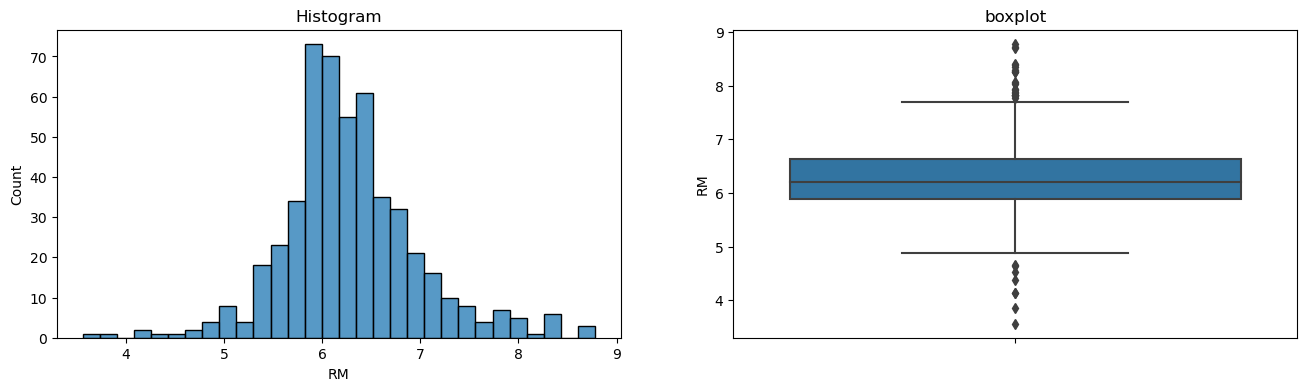


 Skewness of RM 0.40361213328874385


In [81]:
diagnostic_plots(boston, 'RM')
print('\n Skewness of RM',boston.RM.skew())

RM >> Normal Distribution

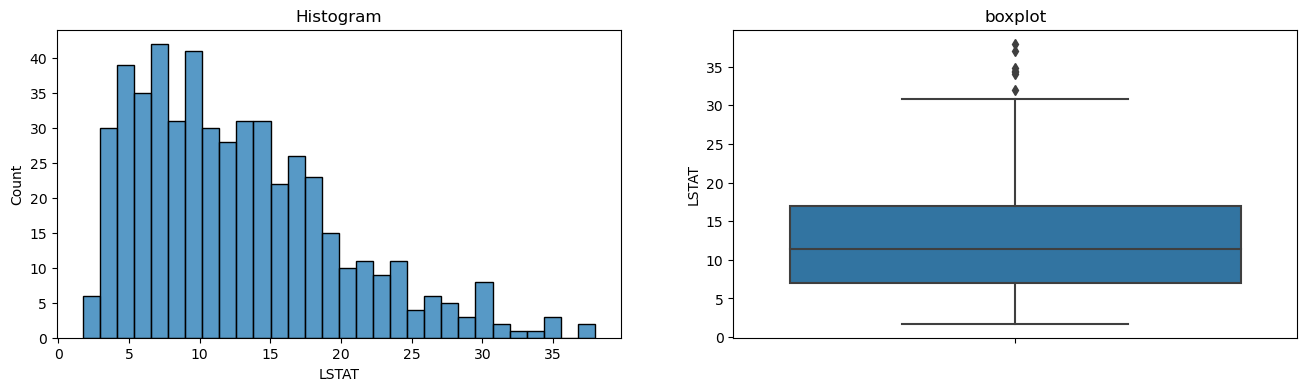


 skewness of LSTAT: 0.9064600935915367


In [82]:
diagnostic_plots(boston,'LSTAT')
print('\n skewness of LSTAT:',boston.LSTAT.skew())

LSTAT >> Positively Skewed

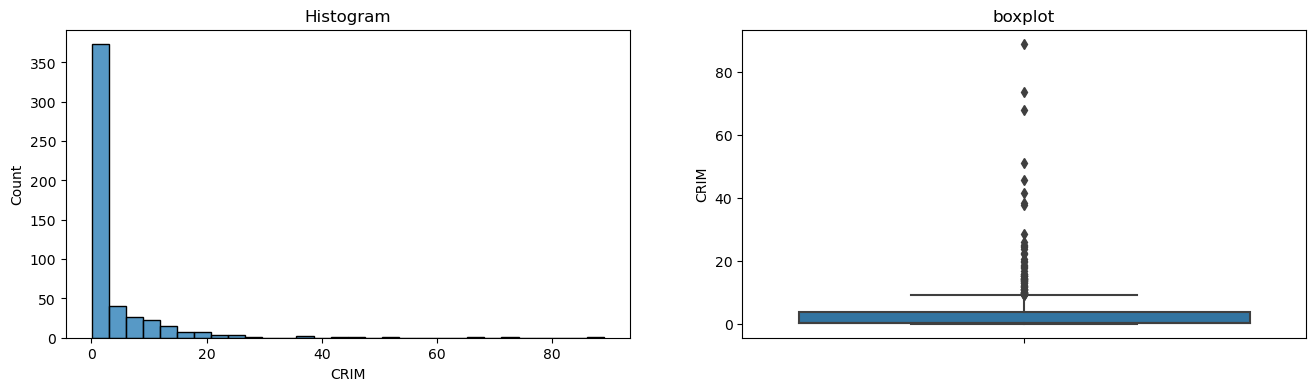


 skewness of CRIM 5.223148798243851


In [83]:
diagnostic_plots(boston, 'CRIM')
print('\n skewness of CRIM', boston.CRIM.skew())

CRIM >> Highly Positively Skewed

In [85]:
# function untuk kolom-kolom yang terdistribusi normal dan skewed

# normal
def find_normal_boundaries(df,variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 *df[variable].std()
    
    return upper_boundary,lower_boundary

# skewed
def find_skewed_boundaries(df,variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (1.5 * IQR)
    upper_boundary = df[variable].quantile(0.75) +(1.5 * IQR)
    return upper_boundary,lower_boundary

In [86]:
find_normal_boundaries(boston,'RM')

(8.392485817597757, 4.176782957105816)

In [87]:
upper_boundary_RM,lower_boundary_RM = find_normal_boundaries(boston,'RM')

In [88]:
upper_boundary_RM

8.392485817597757

In [89]:
print('Total Number of Houses', len(boston))
print('Houses with more than 8.4 rooms', len(boston[boston.RM>upper_boundary_RM]))
print('Houses with less than 4.17 rooms', len(boston[boston.RM<lower_boundary_RM]))

Total Number of Houses 506
Houses with more than 8.4 rooms 4
Houses with less than 4.17 rooms 4


In [91]:
print((8/506*100),'%','data outliers')

1.5810276679841897 % data outliers


In [92]:
upper_boundary_CRIM,lower_boundary_CRIM = find_skewed_boundaries(boston,'CRIM')

In [93]:
print(upper_boundary_CRIM,lower_boundary_CRIM)

9.06963875 -5.31051125


In [94]:
print('Total houses',len(boston))
print('Houses with CRIM bigger than 9 :', len(boston[boston.CRIM>upper_boundary_CRIM]))

Total houses 506
Houses with CRIM bigger than 9 : 66


In [95]:
print((66/506*100),'%','data outliers')

13.043478260869565 % data outliers


In [96]:
upper_boundary_LSTAT,lower_boundary_LSTAT = find_skewed_boundaries(boston,'LSTAT')
upper_boundary_LSTAT,lower_boundary_LSTAT

(31.962500000000006, -8.057500000000005)

In [97]:
print('Total Houses :',len(boston))
print('Houses with LSTAT bigger than 32 :', len(boston[boston.LSTAT>upper_boundary_LSTAT]))

Total Houses : 506
Houses with LSTAT bigger than 32 : 7


In [98]:
print((7/506*100),'%','data outliers')

1.383399209486166 % data outliers


## Trimming
### Trimming or Truncation

Trimming, also known as truncation, involves removing the outliers from the dataset. We only need to decide on a metric to determine outliers. As we saw in section 3, this can be the Gaussian approximation for normally distributed variables or the inter-quantile range proximity rule for skewed variables.

**Advantages :**
- quick

**Limitations :**
- outliers for one variable could contain useful information in the other variables
- if there are outliers across many variables, we could remove a big chunk of dataset

**Important :**
Outliers should be detected AND removed ONLY from the training set, and NOT from the test set. So we should first divide our data set into train and tests, and remove outliers in the train set, but keep those in the test set, and measure how well our model is doing.

In [99]:
boston = boston_dataset[['DIS','LSTAT','CRIM']]

In [100]:
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


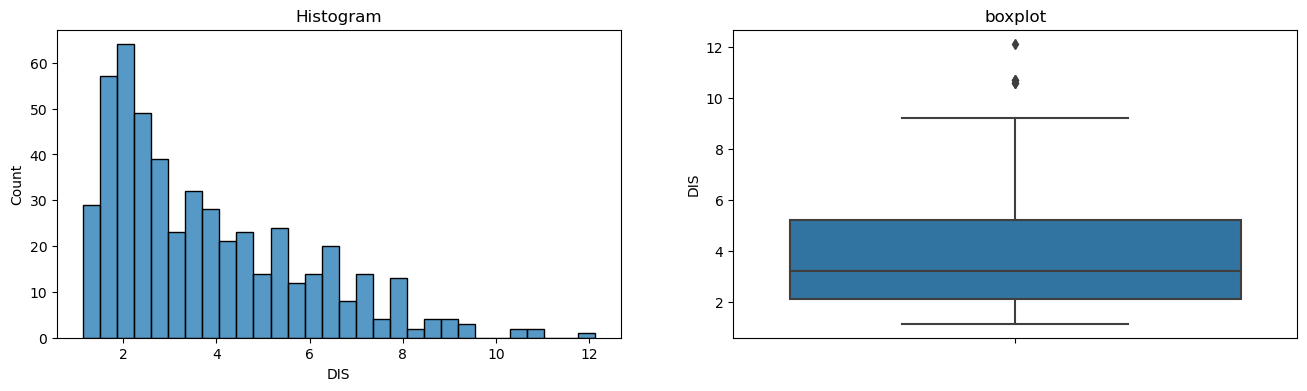

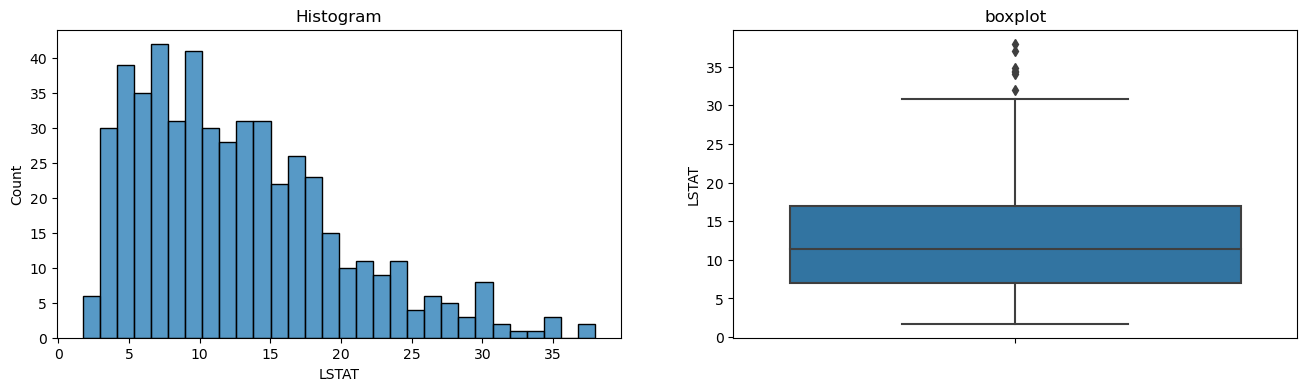

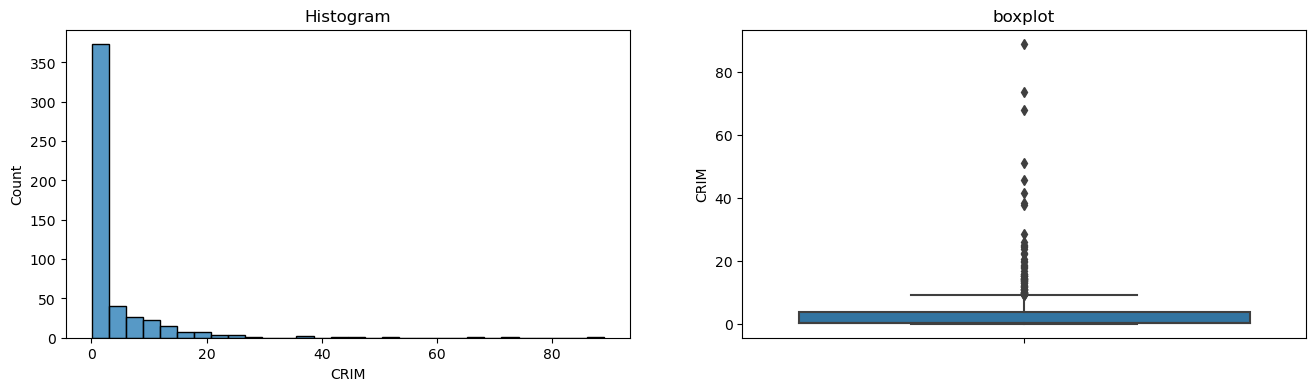

In [101]:
diagnostic_plots(boston,'DIS')
diagnostic_plots(boston,'LSTAT')
diagnostic_plots(boston,'CRIM')

In [102]:
print('Skewness of DIS :', boston.DIS.skew())

Skewness of DIS : 1.0117805793009007


In [103]:
upper_boundary_DIS,lower_boundary_DIS = find_skewed_boundaries(boston,'DIS')
upper_boundary_DIS,lower_boundary_DIS

(9.820800000000002, -2.5322000000000005)

In [104]:
upper_boundary_CRIM, lower_boundary_CRIM

(9.06963875, -5.31051125)

In [105]:
upper_boundary_LSTAT, lower_boundary_LSTAT

(31.962500000000006, -8.057500000000005)

In [106]:
#trimming
outliers_DIS = np.where(boston.DIS>upper_boundary_DIS, True, 
                        np.where(boston.DIS<lower_boundary_DIS,True,False))
outliers_CRIM = np.where(boston.CRIM>upper_boundary_CRIM,True,
                        np.where(boston.CRIM<lower_boundary_CRIM,True,False))
outliers_LSTAT = np.where(boston.LSTAT>upper_boundary_LSTAT,True,
                         np.where(boston.LSTAT<lower_boundary_LSTAT,True,False))

In [108]:
outliers_CRIM

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [109]:
boston_trimmed  = boston[~(outliers_DIS+outliers_LSTAT+outliers_CRIM)]
print(boston.shape)

(506, 3)


In [110]:
print(boston_trimmed.shape)

(434, 3)


In [111]:
72/506*100

14.229249011857709

We can see that using trimming, we removed 72 rows, from a dataset of 506 rows, this is about ~14.2% of the data was removed. This is mostly why, we do not tend to use trimming much in machine learning. But if only a few variables present a tiny proportion of outliers, trimming could work.

DIS before trim


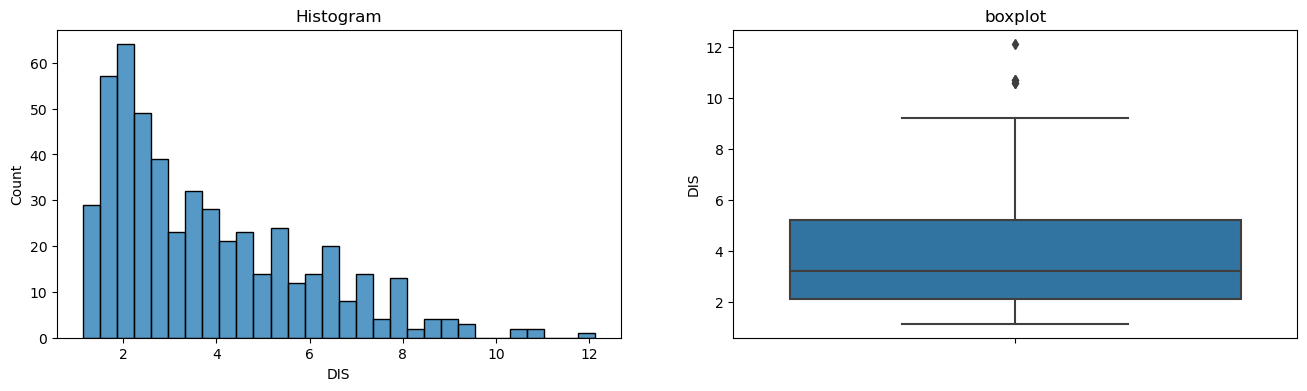

/n DIS after trimmed


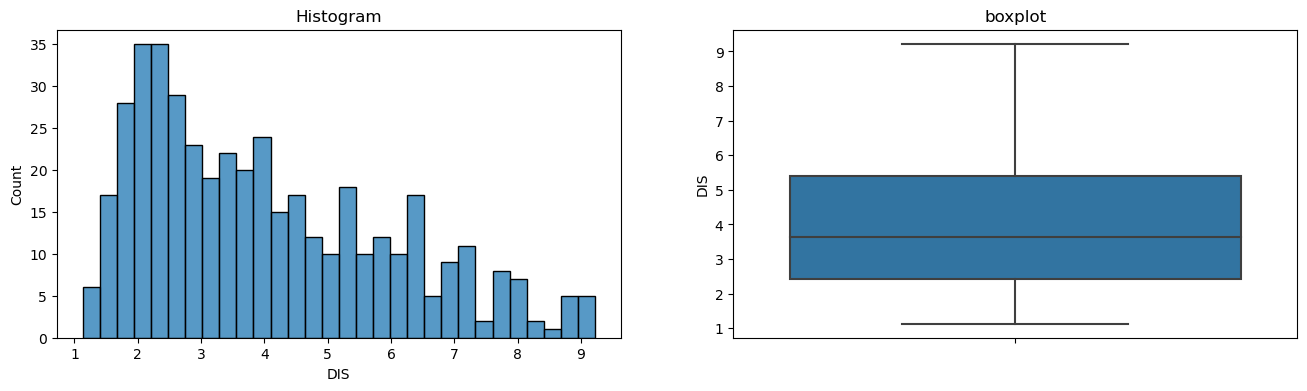

In [112]:
print('DIS before trim')
diagnostic_plots(boston,'DIS')
print('/n DIS after trimmed')
diagnostic_plots(boston_trimmed,'DIS')

CRIM before trim


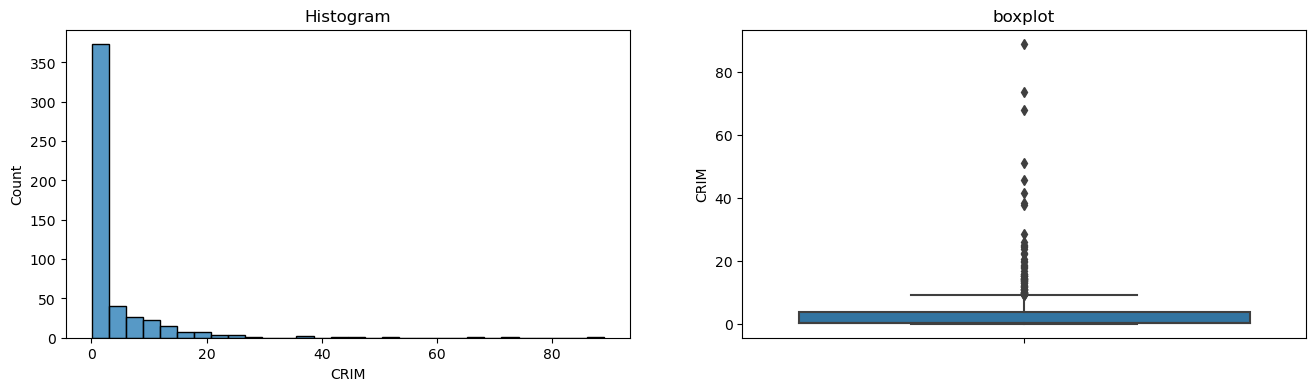


 CRIM after trimmed


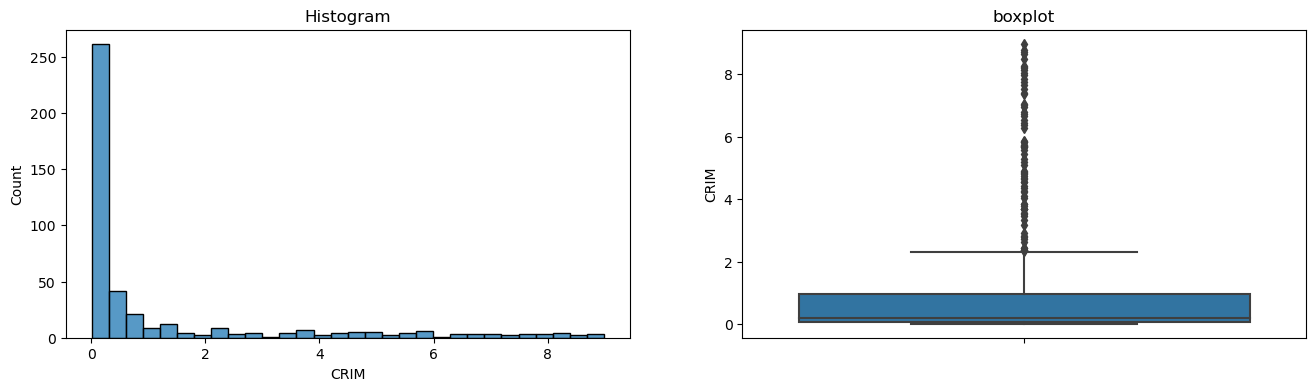

In [113]:
print('CRIM before trim')
diagnostic_plots(boston,'CRIM')
print('\n CRIM after trimmed')
diagnostic_plots(boston_trimmed,'CRIM')

<AxesSubplot:xlabel='CRIM'>

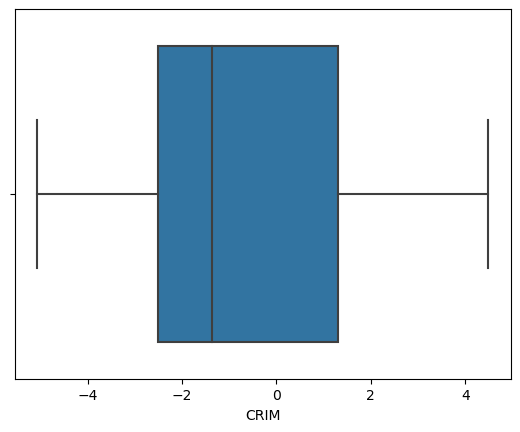

In [114]:
# log transform
sns.boxplot(np.log(boston.CRIM))

## Censoring or Capping

Censoring, or capping, means capping the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are censored.

Capping can be done at both tails, or just one of the tails, depending on the variable and the user.

**Advantages :**
- does not remove data

**Limitations :**
- distorts the distributions of the variables
- distorts the relationships among variables

**Important :**
When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

In [115]:
!pip install feature-engine

from feature_engine.outliers import Winsorizer

     ------------------------------------- 319.4/319.4 kB 79.1 kB/s eta 0:00:00


In [116]:
boston.head()

,DIS,LSTAT,CRIM
0,4.0900,4.98,0.00632
1,4.9671,9.14,0.02731
2,4.9671,4.03,0.02729
3,6.0622,2.94,0.03237
4,6.0622,5.33,0.06905


In [117]:
winsor = Winsorizer(capping_method = 'iqr',
                   tail = 'both',
                   fold=1.5,
                   variables=['DIS','LSTAT','CRIM'])
boston_t = winsor.fit_transform(boston)

In [118]:
print(boston_t.shape)

(506, 3)


In [119]:
print(boston.shape)

(506, 3)


In [120]:
print('lower boundary \n', winsor.left_tail_caps_)
print('upper boundary \n', winsor.right_tail_caps_)

lower boundary 
 {'DIS': -2.5322000000000005, 'LSTAT': -8.057500000000005, 'CRIM': -5.31051125}
upper boundary 
 {'DIS': 9.820800000000002, 'LSTAT': 31.962500000000006, 'CRIM': 9.06963875}


In [121]:
print('Boston - Before Capping')
print(boston.describe())

print('\n Boston - After Capping')
print(boston_t.describe())

Boston - Before Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.795043   12.653063    3.613524
std      2.105710    7.141062    8.601545
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max     12.126500   37.970000   88.976200

 Boston - After Capping
              DIS       LSTAT        CRIM
count  506.000000  506.000000  506.000000
mean     3.783947   12.612011    2.225032
std      2.069765    7.016829    3.313353
min      1.129600    1.730000    0.006320
25%      2.100175    6.950000    0.082045
50%      3.207450   11.360000    0.256510
75%      5.188425   16.955000    3.677083
max      9.820800   31.962500    9.069639


DIS before capping


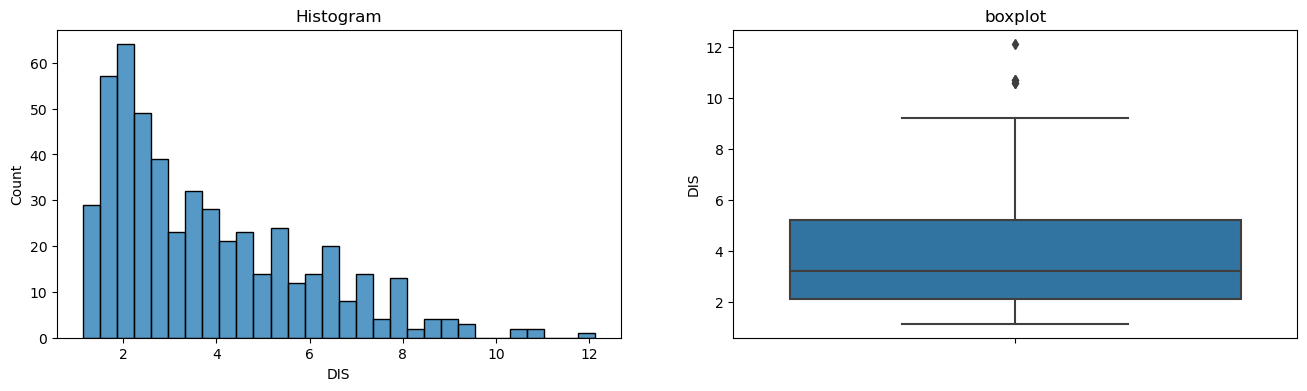


 DIS after capping


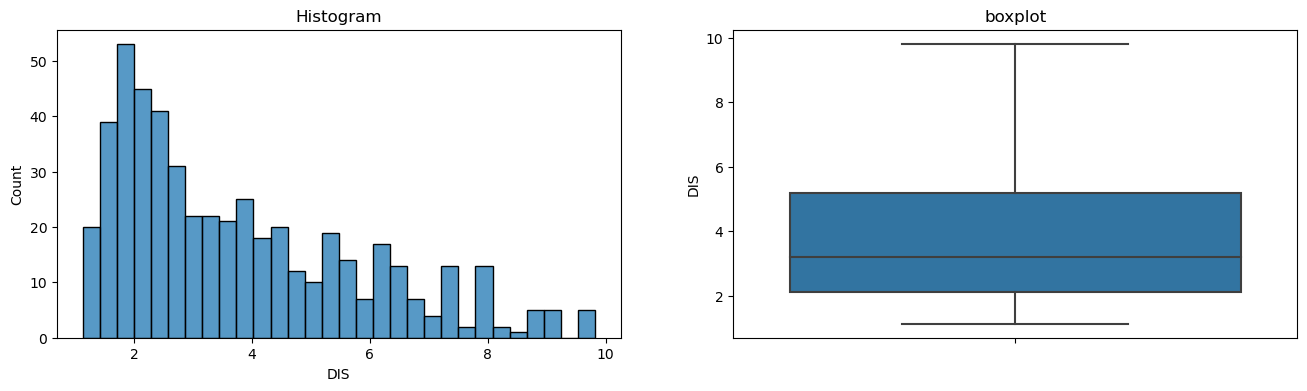

In [122]:
print('DIS before capping')
diagnostic_plots(boston,'DIS')
print('\n DIS after capping')
diagnostic_plots(boston_t,'DIS')

CRIM before capping


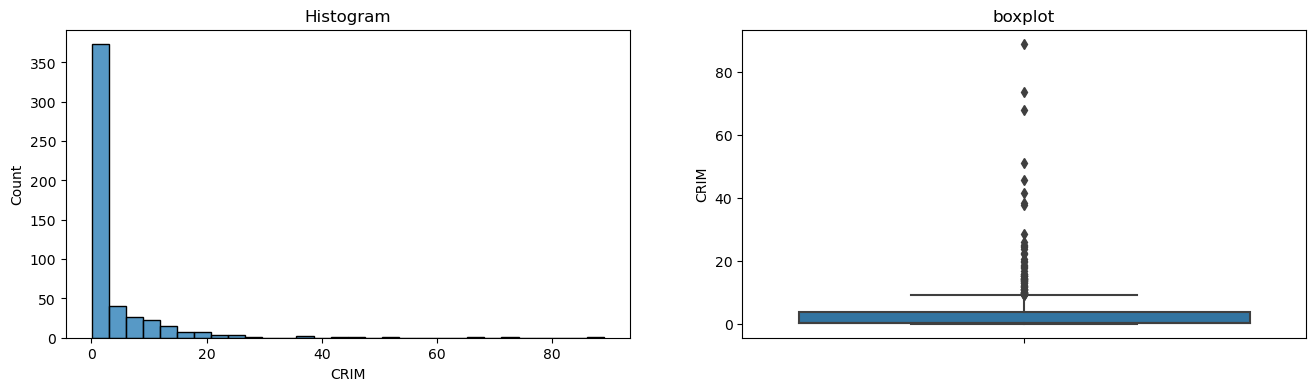


 CRIM after capping


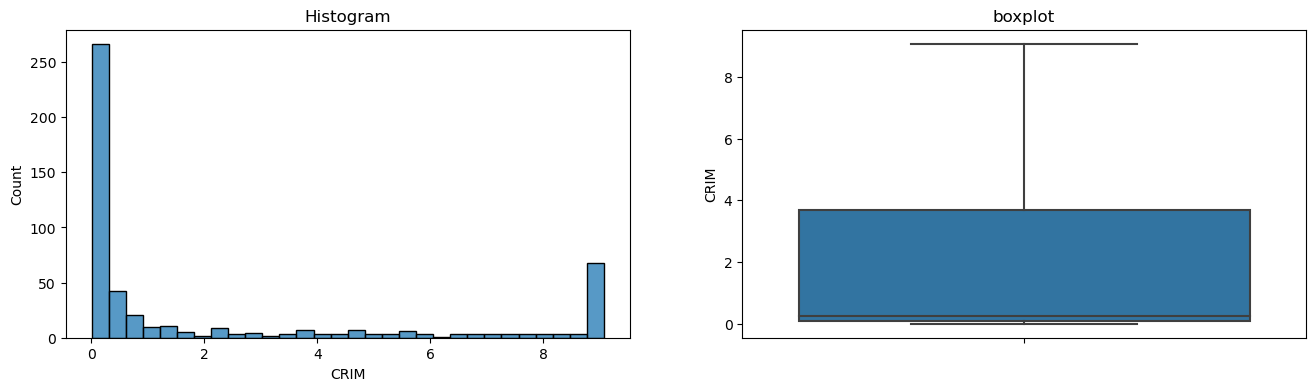

In [123]:
print('CRIM before capping')
diagnostic_plots(boston,'CRIM')
print('\n CRIM after capping')
diagnostic_plots(boston_t,'CRIM')

## Cardinality

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split

In [125]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [126]:
url = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl'
data = pd.read_csv(url)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [127]:
data.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', '?', 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [128]:
data.cabin.nunique()

187

In [129]:
data['cabin_reduced'] = data.cabin.str[0]
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_reduced
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON",C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?,?


In [130]:
print(data.cabin.nunique())

187


In [131]:
print(data.cabin_reduced.nunique())

9


In [132]:
use_cols = ['cabin','cabin_reduced','sex']

In [133]:
X_train,X_test,y_train,y_test = train_test_split(data[use_cols],data['survived'],test_size=0.3,random_state=0)

In [134]:
X_train.cabin.nunique()

151

In [135]:
X_test.cabin.nunique()

71

In [136]:
X_train.cabin_reduced.nunique()

9

In [137]:
X_test.cabin_reduced.nunique()

8

## Cardinality's Effect to ML Performance

In [138]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [139]:
cabin_dict = {k:i for i ,k in enumerate(X_train.cabin.unique(),0)}

In [140]:
print('total cabin unique X_train:',len(X_train.cabin.unique()))
print('total cabin unique data', len(data.cabin.unique()))

total cabin unique X_train: 151
total cabin unique data 187


In [141]:
print(cabin_dict)

{'?': 0, 'E36': 1, 'C68': 2, 'E24': 3, 'C22 C26': 4, 'D38': 5, 'B50': 6, 'A24': 7, 'C111': 8, 'F': 9, 'C6': 10, 'C87': 11, 'E8': 12, 'B45': 13, 'C93': 14, 'D28': 15, 'D36': 16, 'C125': 17, 'B35': 18, 'T': 19, 'B73': 20, 'B57 B59 B63 B66': 21, 'A26': 22, 'A18': 23, 'B96 B98': 24, 'G6': 25, 'C78': 26, 'C101': 27, 'D9': 28, 'D33': 29, 'C128': 30, 'E50': 31, 'B26': 32, 'B69': 33, 'E121': 34, 'C123': 35, 'B94': 36, 'A34': 37, 'D': 38, 'C39': 39, 'D43': 40, 'E31': 41, 'B5': 42, 'D17': 43, 'F33': 44, 'E44': 45, 'D7': 46, 'A21': 47, 'D34': 48, 'A29': 49, 'D35': 50, 'A11': 51, 'B51 B53 B55': 52, 'D46': 53, 'E60': 54, 'C30': 55, 'D26': 56, 'E68': 57, 'A9': 58, 'B71': 59, 'D37': 60, 'F2': 61, 'C55 C57': 62, 'C89': 63, 'C124': 64, 'C23 C25 C27': 65, 'C126': 66, 'E49': 67, 'F E46': 68, 'E46': 69, 'D19': 70, 'B58 B60': 71, 'C82': 72, 'B52 B54 B56': 73, 'C92': 74, 'E45': 75, 'F G73': 76, 'C65': 77, 'E25': 78, 'B3': 79, 'D40': 80, 'C91': 81, 'B102': 82, 'B61': 83, 'F G63': 84, 'A20': 85, 'B36': 86, 'C

In [142]:
X_train['cabin_mapped'] = X_train['cabin'].map(cabin_dict)
X_test ['cabin_mapped'] = X_test['cabin'].map(cabin_dict)

In [143]:
X_train.sample(10)

,cabin,cabin_reduced,sex,cabin_mapped
259,?,?,male,0
617,?,?,male,0
473,?,?,male,0
56,B96 B98,B,male,24
653,?,?,female,0
1014,?,?,female,0
1101,?,?,male,0
1282,?,?,male,0
582,?,?,female,0
1204,?,?,male,0


In [144]:
X_test['cabin_mapped'].fillna(0,inplace=True)
X_test.sample(10)

,cabin,cabin_reduced,sex,cabin_mapped
893,?,?,male,0.0
14,A23,A,male,0.0
773,?,?,male,0.0
322,C32,C,female,0.0
198,D30,D,female,125.0
364,?,?,male,0.0
390,?,?,male,0.0
725,?,?,female,0.0
204,?,?,female,0.0
988,?,?,male,0.0


In [145]:
cabin_reduced_dict = {k:i for i,k in enumerate(X_train.cabin_reduced.unique(),0)}

print('Before Replace')
print(X_train[['cabin_reduced','cabin']].head(10))

Before Replace
     cabin_reduced cabin
501              ?     ?
588              ?     ?
402              ?     ?
1193             ?     ?
686              ?     ?
971              ?     ?
117              E   E36
540              ?     ?
294              C   C68
261              E   E24


In [146]:
X_train['cabin_reduced'] = X_train['cabin_reduced'].map(cabin_reduced_dict)
X_test['cabin_reduced'] = X_test['cabin_reduced'].map(cabin_reduced_dict)
X_test.cabin_reduced.isna().sum()

0

In [147]:
X_train

,cabin,cabin_reduced,sex,cabin_mapped
501,?,0,female,0
588,?,0,female,0
402,?,0,female,0
1193,?,0,male,0
686,?,0,female,0
...,...,...,...,...
763,?,0,female,0
835,?,0,male,0
1216,?,0,female,0
559,?,0,female,0


In [148]:
sex_dict = {'male':0,'female':1}

X_train['sex'] = X_train['sex'].map(sex_dict)
X_test['sex'] = X_test['sex'].map(sex_dict)

In [149]:
X_train

,cabin,cabin_reduced,sex,cabin_mapped
501,?,0,1,0
588,?,0,1,0
402,?,0,1,0
1193,?,0,0,0
686,?,0,1,0
...,...,...,...,...
763,?,0,1,0
835,?,0,0,0
1216,?,0,1,0
559,?,0,1,0


In [150]:
rf = RandomForestClassifier(n_estimators=200,random_state=39)

rf.fit(X_train[['cabin_mapped','sex']],y_train)

pred_train = rf.predict_proba(X_train[['cabin_mapped','sex']])
pred_test = rf.predict_proba(X_test[['cabin_mapped','sex']])

In [151]:
print('Train Set')
print('RF ROC-AUC Train:', roc_auc_score(y_train,pred_train[:,1]))

Train Set
RF ROC-AUC Train: 0.8561832352985574


In [152]:
print('Test Set')
print('RF ROC-AUC Test:', roc_auc_score(y_test,pred_test[:,1]))

Test Set
RF ROC-AUC Test: 0.7707953099939163


Overvitting >> akibat dari cardinality

In [153]:
rf = RandomForestClassifier(n_estimators=200,random_state=39)

rf.fit(X_train[['cabin_reduced','sex']],y_train)

pred_train = rf.predict_proba(X_train[['cabin_reduced','sex']])
pred_test = rf.predict_proba(X_test[['cabin_reduced','sex']])

In [154]:
print('Train Set')
print('RF ROC-AUC Train:', roc_auc_score(y_train,pred_train[:,1]))

Train Set
RF ROC-AUC Train: 0.8163420365403872


In [155]:
print('Test Set')
print('RF ROC-AUC Test:', roc_auc_score(y_test,pred_test[:,1]))

Test Set
RF ROC-AUC Test: 0.8017670482827277


## Hyperparameter Tuning

In [156]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [157]:
dataset = load_breast_cancer()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3 ,random_state=101)

In [158]:
model = SVC()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [159]:
param_grid = {'C': [0.1,1,10,100],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'gamma':['scale','auto'],
              'kernel':['linear']
    
}

In [160]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=3)

In [162]:
print(grid.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


In [163]:
grid.best_score_

0.9673417721518988

In [164]:
model_tuned = grid.best_estimator_

In [165]:
pred_tuned = model_tuned.predict(X_test)

In [166]:
print('before tuning \n')
print(classification_report(y_test,y_pred))
print('after tuning \n')
print(classification_report(y_test,pred_tuned))

before tuning 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

after tuning 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

